In [87]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV   #Perforing grid search
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error,confusion_matrix,accuracy_score
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from math import sqrt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import GaussianNB

### Data Loading

In [2]:
df_training = pd.read_csv("df_training_scholarjet.csv")
df_training.head(10)
df_training[df_training.convert_30 == 1].head(10)

,Unnamed: 0,cuid,convert_30,revenue_30,roll_up,currentstatus,companytypegroup,team,customersource,accrole,...,percemailopenedyearsixty,percemailclickedone,percemailclickedthreeone,percemailclickedseventhree,percemailclickedthirtyseven,percemailclickedsixtythirty,percemailclickedyearsixty,currentapplicability,numemaillist,dayssinceenrollment
7,14,363,1,323.97,Onboarding,Active,Business,US,External Application,None,...,0.222433,0.0,0.000000,0.000000,0.023529,0.015957,0.071293,8.333333,3.0,42
24,59,1328,1,34.94,Onboarding,Enrolled,Business,US,External Application,None,...,0.129834,0.0,0.000000,0.000000,0.000000,0.000000,0.005525,4.333333,3.0,3
34,78,1716,1,4398.06,Onboarding,Enrolled,Trade,US,Internal Customer Scrape,Primary,...,0.053191,0.0,0.000000,0.400000,0.031746,0.011364,0.021277,7.333333,3.0,7
40,94,2069,1,1905.63,Onboarding,Enrolled,Business,US,External Application,None,...,0.058140,0.0,0.000000,0.000000,0.000000,0.066667,0.000000,3.000000,1.0,9
42,97,2137,1,2022.69,Onboarding,Enrolled,Business,US,Internal Customer Scrape,None,...,0.032258,0.0,0.000000,0.000000,0.000000,0.000000,0.016129,4.000000,2.0,10
43,101,2170,1,489.99,Onboarding,Active,Business,US,External Application,Purchaser,...,0.283784,0.0,0.285714,0.000000,0.127273,0.188235,0.059459,7.000000,1.0,1
49,118,2478,1,7632.70,Onboarding,Enrolled,Business,US,Search - Paid,None,...,0.082840,0.0,0.000000,0.000000,0.100000,0.073171,0.032544,NaN,NaN,6
55,134,2776,1,287.99,Onboarding,Enrolled,Business,US,Internal Customer Scrape,Purchaser,...,0.160950,0.0,0.000000,0.111111,0.062500,0.156463,0.120053,7.000000,2.0,33
58,144,3047,1,895.89,Onboarding,Active,Business,US,Affiliates,Primary,...,0.352113,0.0,0.000000,0.000000,0.060606,0.000000,0.014085,7.000000,1.0,10
61,158,3447,1,357.95,Onboarding,Enrolled,Business,US,Affiliates,Purchaser,...,0.000000,0.0,0.000000,0.000000,0.222222,0.000000,0.000000,7.000000,1.0,13


In [3]:
Targets = df_training[['convert_30','revenue_30']]
X = df_training.drop(["convert_30", "revenue_30"], axis=1)

### Data Cleaning

In [4]:
categorical_list = []
numerical_list = []
for i in df_training.columns.tolist():
    if df_training[i].dtype=='object':
        categorical_list.append(i)
    else:
        if i not in ['cuid','convert_30','revenue_30','Unnamed: 0']:
            numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))

Number of categorical features: 10
Number of numerical features: 170


In [5]:
categorical_list

['roll_up',
 'currentstatus',
 'companytypegroup',
 'team',
 'customersource',
 'accrole',
 'num_employees',
 'num_purchases_year',
 'cost_purchases_year',
 'enrollmentmethod']

#### 1. Check for Missing Values

In [6]:
print (df_training.isnull().sum())

Unnamed: 0                          0
cuid                                0
convert_30                          0
revenue_30                          0
roll_up                             0
currentstatus                       0
companytypegroup                    0
team                                0
customersource                      0
accrole                             0
num_employees                       0
num_purchases_year                  0
cost_purchases_year                 0
enrollmentmethod                    0
numorderone                     18424
numorderthreeone                18424
numorderseventhree              18424
numorderthirtyseven             18424
numordersixtythirty             18424
numorderyearsixty               18424
sumrevone                       18424
sumrevthreeone                  18424
sumrevseventhree                18424
sumrevthirtyseven               18426
sumrevsixtythirty               18425
sumrevyearsixty                 18426
numbamorder 

There seems to be a lot of missing values in the numerical features. While, all the features are not going to be useful in modelling, it can be important in producing different visuals, plots and relationships.

1. One way is to simply remove all the features that contain a lot of missing values because it is cheaper for us to spend time avoiding missing data than estimating the right values and it also reduces the uncertainty of data.
2. Other way is to define a strategy and impute values based on the strategy. One of the most common ones is using a median value or simply replacing it with a 0 value.

#### Univariate Feature Imputation

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.

In [7]:
categorical_columns = []
numeric_columns = []
for c in df_training.columns:
    if df_training[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames - categorical and numerical 
data_numeric = df_training[numeric_columns]
data_categorical = pd.DataFrame(df_training[categorical_columns])

#Impute missing values in the numerical features
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
data_numeric = pd.DataFrame(imp.fit_transform(data_numeric), columns = data_numeric.columns) #only apply imputer to numeric columns

#No missing values in the categorical features as per the initial investigation 

#join the two masked dataframes back together
data_joined = pd.concat([data_numeric, data_categorical], axis = 1)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
data_joined.columns

Index(['Unnamed: 0', 'cuid', 'convert_30', 'revenue_30', 'numorderone',
       'numorderthreeone', 'numorderseventhree', 'numorderthirtyseven',
       'numordersixtythirty', 'numorderyearsixty',
       ...
       'roll_up', 'currentstatus', 'companytypegroup', 'team',
       'customersource', 'accrole', 'num_employees', 'num_purchases_year',
       'cost_purchases_year', 'enrollmentmethod'],
      dtype='object', length=184)

In [9]:
len(categorical_columns)

10

In [10]:
print (data_joined.isna().sum())

Unnamed: 0                     0
cuid                           0
convert_30                     0
revenue_30                     0
numorderone                    0
numorderthreeone               0
numorderseventhree             0
numorderthirtyseven            0
numordersixtythirty            0
numorderyearsixty              0
sumrevone                      0
sumrevthreeone                 0
sumrevseventhree               0
sumrevthirtyseven              0
sumrevsixtythirty              0
sumrevyearsixty                0
numbamorder                    0
numselforder                   0
totalrev                       0
aov                            0
dayssincelastord               0
cuidshare                      0
numstores                      0
pospercentage                  0
numinf                         0
numinfconnect                  0
numinfphone                    0
numinfquote                    0
percentlarge                   0
percdirtythirty                0
          

#### 2. Handling Categorical Variables

https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

In [11]:
print(pd.unique(data_joined['num_employees']))
print(pd.unique(data_joined['num_purchases_year']))
print(pd.unique(data_joined['cost_purchases_year']))

['50plus' '2to5' '1' '6to10' 'None' '11to50']
['1to2' '25plus' '3to5' '11to25' 'None' '6to10']
['lessthan1' '25to100' '1to5' '5to25' 'None' '100plus']


#### 1. Dummy Encoding 

In [12]:
data_joined.num_employees = data_joined.num_employees.replace({"None":0,"1":1,"2to5":4,"6to10":8,"11to50":32,"50plus":60})
data_joined.num_purchases_year = data_joined.num_purchases_year.replace({'1to2':1, '25plus':32, '3to5':4, '11to25':16, 'None':0, '6to10':8})
data_joined.cost_purchases_year = data_joined.cost_purchases_year.replace({'lessthan1':1, '25to100':64, '1to5':4, '5to25':16, 'None':0, '100plus':126})


#### 2. One-Hot Encoding 

In [13]:
onehot_data = pd.get_dummies(data_joined, drop_first=True)

In [14]:
"roll_up_Unmanaged" in onehot_data.columns

True

Now the data seems ready to use, we can check for class imbalance to remedy that before diving deep into the modelling part.

In [15]:
X = onehot_data.drop(['cuid','revenue_30','Unnamed: 0'], axis=1)
y = onehot_data.convert_30
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=4)
X_test_class = X_test_class.drop("convert_30",axis=1)
feature_names = X_test_class.columns.tolist()

#### Check for Class Imbalance

In [16]:
x,y= X_train_class['convert_30'].value_counts()

In [17]:
x

20179

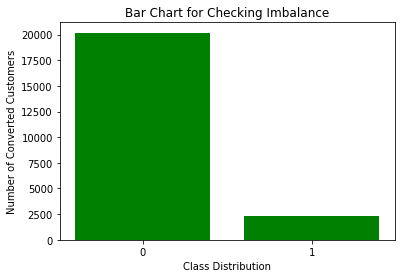

In [18]:
#plt.bar([0,1],[x, y],)
classes = ['0','1']
dist = [x,y]
plt.bar(classes,dist, color='green')
plt.title("Bar Chart for Checking Imbalance")
plt.ylabel("Number of Converted Customers")
plt.xlabel("Class Distribution")
plt.show()

#### Dealing with Class-Imbalance: Resampling Techniques 

https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. So there is a need to deal with the class imbalance before modelling. There are several techniques we've explored in the case-study that can be used in dealing with class imbalance.
 1. Over-Sampling Minority Class:
 2. Under-Sampling Majority Class:
 3. Synthetic Minority OverSampling Technique:
 

#### Over-Sampling the Minority Class

In [19]:
df_majority = X_train_class[X_train_class.convert_30==0]
df_minority = X_train_class[X_train_class.convert_30==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=20179, 
                                 random_state=12) 
 

df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 

X_train_balance = df_upsampled.drop(['convert_30'], axis=1)
y_train_balance = df_upsampled.convert_30


### Feature-Selection Techniques

This case-study requires a lot of exploration with different feature selection techniques because:

1) There is a strong collinearity between features (as demonstrated below).
2) There are an overwhelming number of features.
3) There is a need to make the model simpler for the interpretability purposes, to reason out and tackle the business problem in such a way that there is an explanation and logical reasoning behind the important features.  

#### 1. Using Pearson's Correlation 

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_upsampled.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

<Figure size 864x720 with 0 Axes>

In [21]:
cor

,convert_30,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,sumrevseventhree,...,customersource_Self ID,customersource_Social - Paid,accrole_Other,accrole_Primary,accrole_Purchaser,enrollmentmethod_directOther,enrollmentmethod_email,enrollmentmethod_liveTransfer,enrollmentmethod_other,enrollmentmethod_phone
convert_30,1.000000,0.083606,0.101475,0.130967,0.181592,0.127740,0.064086,0.058315,0.065629,0.075331,...,-0.008622,-0.082905,0.004260,0.007062,-0.014510,-0.041328,0.039422,0.030905,-0.093961,0.028553
numorderone,0.083606,1.000000,-0.005571,0.039872,0.025987,0.021506,-0.036492,0.621797,-0.000644,0.018471,...,-0.001054,-0.014756,-0.004983,0.002668,-0.013695,-0.012440,-0.005815,0.038827,-0.030212,0.008595
numorderthreeone,0.101475,-0.005571,1.000000,0.025928,0.051043,-0.000511,-0.056558,-0.005220,0.740182,0.012062,...,-0.001298,-0.025104,-0.006137,0.026795,0.005416,-0.012318,-0.008847,0.089527,-0.049627,0.028573
numorderseventhree,0.130967,0.039872,0.025928,1.000000,0.119817,0.067300,-0.018083,0.015380,-0.002425,0.555258,...,0.009244,-0.010434,-0.003749,-0.015770,-0.002752,-0.021860,-0.020487,0.015097,-0.053329,0.004897
numorderthirtyseven,0.181592,0.025987,0.051043,0.119817,1.000000,0.297443,0.057796,-0.006262,0.011550,0.063585,...,-0.002750,-0.047712,-0.000203,-0.021374,-0.011404,-0.009495,-0.015285,0.020752,-0.032667,-0.004290
numordersixtythirty,0.127740,0.021506,-0.000511,0.067300,0.297443,1.000000,0.241593,-0.003688,-0.006579,0.020070,...,-0.002186,-0.032898,-0.001597,-0.004915,-0.005277,-0.001645,-0.003767,0.017418,0.027970,-0.031464
numorderyearsixty,0.064086,-0.036492,-0.056558,-0.018083,0.057796,0.241593,1.000000,-0.009282,-0.050979,0.015872,...,-0.002810,-0.029631,0.029626,0.039498,0.004921,0.072923,-0.031174,-0.046923,0.186523,-0.066189
sumrevone,0.058315,0.621797,-0.005220,0.015380,-0.006262,-0.003688,-0.009282,1.000000,0.002346,0.007978,...,-0.000702,-0.015886,-0.003321,0.008210,-0.012993,-0.008930,-0.012426,0.013641,-0.020604,0.015920
sumrevthreeone,0.065629,-0.000644,0.740182,-0.002425,0.011550,-0.006579,-0.050979,0.002346,1.000000,0.001182,...,-0.000834,-0.014052,-0.003943,0.017699,0.000032,-0.017305,-0.012756,0.078132,-0.024595,0.008338
sumrevseventhree,0.075331,0.018471,0.012062,0.555258,0.063585,0.020070,0.015872,0.007978,0.001182,1.000000,...,0.001994,-0.012264,-0.003419,-0.014136,0.002960,-0.019811,-0.008621,0.038166,-0.038559,-0.020809


In [22]:
#Correlation with output variable
cor_target = abs(cor["convert_30"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

convert_30                      1.000000
dayssincelastord                0.225605
numvisitone                     0.225842
numvisitthreeone                0.257456
numvisitseventhree              0.279187
numvisitthirtyseven             0.292702
numvisitsixtythirty             0.231451
numvisittotal                   0.246942
numloggedinone                  0.207460
numloggedinthreeone             0.242205
numloggedinseventhree           0.263917
numloggedinthirtyseven          0.263903
numloggedinsixtythirty          0.201889
numsecondsonsiteseventhree      0.201602
numsecondsonsitethirtyseven     0.236587
numtotalpageviewsseventhree     0.221168
numtotalpageviewsthirtyseven    0.256707
numatcseventhree                0.202914
numatcthirtyseven               0.242652
dayssincelastvisit              0.234036
numsearchtermsthirtyseven       0.227445
numskusviewedseventhree         0.209787
numskusviewedthirtyseven        0.242284
roll_up_Unmanaged               0.242049
currentstatus_En

In [23]:
Feature_SelectionSet1= X_train_balance[['dayssincelastord', 'numvisitone','numvisitthreeone','numvisitseventhree','numvisitthirtyseven',             
'numvisitsixtythirty','numvisittotal','numloggedinone','numloggedinthreeone','numloggedinseventhree',           
'numloggedinthirtyseven','numloggedinsixtythirty', 'numsecondsonsiteseventhree' ,'numsecondsonsitethirtyseven',     
'numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numatcseventhree','numatcthirtyseven','dayssincelastvisit',              
'numsearchtermsthirtyseven','numskusviewedseventhree','numskusviewedthirtyseven','roll_up_Unmanaged','currentstatus_Enrolled'  ]] 

In [24]:
'dayssincelastord', 'numvisitone','numvisitthreeone','numvisitseventhree','numvisitthirtyseven',             
'numvisitsixtythirty','numvisittotal','numloggedinone','numloggedinthreeone','numloggedinseventhree',           
'numloggedinthirtyseven','numloggedinsixtythirty', 'numsecondsonsiteseventhree' ,'numsecondsonsitethirtyseven'     
'numtotalpageviewsseventhree','numtotalpageviewsthirtyseven','numatcseventhree','numatcthirtyseven','dayssincelastvisit',              
'numsearchtermsthirtyseven','numskusviewedseventhree','numskusviewedthirtyseven','roll_up_Unmanaged','currentstatus_Enrolled'   

('numsearchtermsthirtyseven',
 'numskusviewedseventhree',
 'numskusviewedthirtyseven',
 'roll_up_Unmanaged',
 'currentstatus_Enrolled')

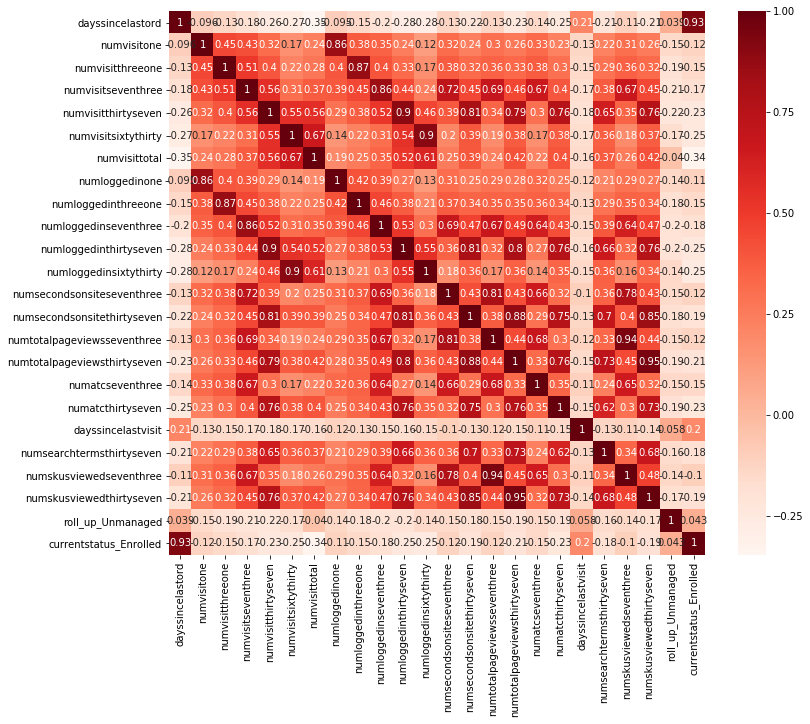

In [25]:
plt.figure(figsize=(12,10))
cor = Feature_SelectionSet1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

One of the assumptions of machine learning models is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest. So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix 

In [26]:
corr_matrix = cor.abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

In [27]:
to_drop

['numloggedinone',
 'numloggedinthreeone',
 'numloggedinseventhree',
 'numloggedinthirtyseven',
 'numloggedinsixtythirty',
 'numsecondsonsitethirtyseven',
 'numtotalpageviewsseventhree',
 'numtotalpageviewsthirtyseven',
 'numskusviewedseventhree',
 'numskusviewedthirtyseven',
 'currentstatus_Enrolled']

In [28]:
Feature_SelectionSet1=Feature_SelectionSet1.drop(Feature_SelectionSet1[to_drop], axis=1)

In [29]:
Feature_Selectionset1 = Feature_SelectionSet1.columns 

#### Inference:
1) Days since last order
2) Number of online visits in the past 1 day
3) Number of online visits in the past 1-3 days
4) Number of online visits in the past 30-7 days
5) Number of online visits in the past 60-30 days
5) Number of ATCs (Add To Cart) in the past 7-3 days
6) Number of visits in the past year
7) Number of seconds on site in the past 7-3 days
8) Number of ATCc in the past 30-7 days
9) Days since last visit
10) Number of search terms in the past 30-7 days
11) rollup - unmanaged

https://www.shopify.com/enterprise/44337411-how-to-increase-your-ecommerce-conversion-rates-using-these-3-analytics-reports

#### Fitting a Baseline Logistic Regression Model

The idea is to compare the models with a variety of feature subsets to evaluate the performance across different subsets. Notice here that we've not yet diving into the modelling part or using logistic regression for the purpose of prediction.  

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train_balance, y_train_balance)

y_pred = logreg.predict(X_test_class)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_class, y_test_class)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.77


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [86]:
X = Feature_SelectionSet1
y = y_train_balance
X_test = X_test_class[['dayssincelastord', 'numvisitone', 'numvisitthreeone',
       'numvisitseventhree', 'numvisitthirtyseven', 'numvisitsixtythirty',
       'numvisittotal', 'numsecondsonsiteseventhree', 'numatcseventhree',
       'numatcthirtyseven', 'dayssincelastvisit', 'numsearchtermsthirtyseven',
       'roll_up_Unmanaged']]
logreg = LogisticRegression()
logreg.fit(Feature_SelectionSet1, y_train_balance)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test_class)))

cm = confusion_matrix(y_test_class, y_pred)
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

# Specificity or true negative rate
tnr = tn/(tn+fp) 

print("True Negative Rate: ", tnr)
print ("Accuracy : ", accuracy_score(y_test_class, y_pred)*100) 
print("F1-score: ", f1_score(y_test_class,  y_pred, average='weighted'))
print("Recall score: ", recall_score(y_test_class,  y_pred, average='weighted'))
print("Precision score: ", precision_score(y_test_class,  y_pred, average='weighted'))
print("Report : ", classification_report(y_test_class, y_pred)) 
print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.75
True Negative Rate:  0.24774193548387097
Accuracy :  75.31105581230003
F1-score:  0.7942791167522251
Recall score:  0.7531105581230003
Precision score:  0.870029746334163
Report :                precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      5019
         1.0       0.25      0.63      0.36       607

    accuracy                           0.75      5626
   macro avg       0.60      0.70      0.60      5626
weighted avg       0.87      0.75      0.79      5626

Balanced Accuracy : 0.700151


Notice the number of features used in both the models and the corresponding accuracy. Using 217 features, the accuracy is 77% and using 12 features, the accuracy is 75%. This does tell us a lot about the subset. Although it does not help in boosting the baseline performance, it is intuitive that most of the features in our data set are not relevant.

To further boost the performance, we explore different feature selection techniques.

#### 2. Recursive Feature Elimination 

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_balance, y_train_balance)
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarni

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False  True  True False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False  True False False False
 False False False False False False False False False False False  True
 False False False False False False False False Fa

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
ranking = print(rfe.ranking_)
rank = list(rfe.ranking_)
all_features = X_train_balance.columns.values.tolist()

[128 114 116  51  21  35  80  61  72  92  69  71  36   8  70  76  45 170
 129 171  23 123  22 110 122 106 124 126 121  20   7 100 133 117 135 137
 150 166  10  96 108  83  73   1   1   1   1   1   1   1   6  19  33  29
  34  55  82  85  79  87 130 107  41  52  47  81  68  63   1   1  48  43
  44  39 113  15   1   5  32  42  37  88  66  31  14  16  30  38  62  28
  58  53  54  46  59  84  86  94  75  77  74  65 104   9  25  98   1 141
 169 154 172 143 127 134 179 163 162 152 151 159 153 155 168 139 148 160
 181 178 177 180 176 184 103   3  26 111  12  93   1  11   1  24   4  27
  60  57  64  91  78  89 175 183 174 182 132   1  17   2  18 112  95 109
  97 102 118 140 120  67  13  49  40  56  50   1   1   1 156 173   1 157
 138 147 149 145 136 144  99   1 146 158 161 142 115 167   1 165 125 164
 105 101 131  90 119]


In [34]:
Feature_Selectionset2 =[]
for i in range(len(rank)):
    if rank[i] == 1 or rank[i] == 2:
        Feature_Selectionset2.append(all_features[i])  
        

In [35]:
Feature_Selectionset2 

['numvisitone',
 'numvisitthreeone',
 'numvisitseventhree',
 'numvisitthirtyseven',
 'numvisitsixtythirty',
 'numvisityearsixty',
 'numvisittotal',
 'numatcone',
 'numatcthreeone',
 'numideaboardseventhree',
 'numtasksfirstintrosixtythirty',
 'numemailsone',
 'numemailsseventhree',
 'percemailopenedone',
 'percemailopenedseventhree',
 'roll_up_Retention',
 'roll_up_Unmanaged',
 'currentstatus_Enrolled',
 'companytypegroup_Trade',
 'customersource_Internal Customer Scrape',
 'customersource_Social - Paid']

In [36]:
Feature_SelectionSet2 = X_train_balance[Feature_Selectionset2] 

In [37]:
Feature_SelectionSet2

,numvisitone,numvisitthreeone,numvisitseventhree,numvisitthirtyseven,numvisitsixtythirty,numvisityearsixty,numvisittotal,numatcone,numatcthreeone,numideaboardseventhree,...,numemailsone,numemailsseventhree,percemailopenedone,percemailopenedseventhree,roll_up_Retention,roll_up_Unmanaged,currentstatus_Enrolled,companytypegroup_Trade,customersource_Internal Customer Scrape,customersource_Social - Paid
820,0.0,1.0,2.0,18.0,9.0,6.0,36.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,0,1,0,0,0
22470,0.0,0.0,0.0,0.0,0.0,34.0,34.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,1,0,0,0,0
4237,0.0,1.0,4.0,10.0,2.0,4.0,21.0,0.0,0.0,1.0,...,0.0,0.0,1.000000,0.875000,0,0,1,0,0,0
6984,0.0,1.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.000000,0.000000,0,0,1,0,0,0
21767,0.0,0.0,0.0,0.0,0.0,24.0,24.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,1,1,0,0,0
20461,0.0,0.0,0.0,1.0,1.0,12.0,20.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,1,1,0,0,0
9341,0.0,0.0,4.0,9.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0
15557,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,1,1,1,0,1
12489,0.0,0.0,3.0,11.0,17.0,273.0,304.0,0.0,0.0,0.0,...,0.0,0.0,1.000000,0.428571,1,0,0,0,0,0
17501,0.0,0.0,0.0,0.0,0.0,27.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0,1,1,0,1,0


In [38]:
X = Feature_Selectionset2
y = y_train_balance
X_test = X_test_class[Feature_Selectionset2]
logreg = LogisticRegression()
logreg.fit(Feature_SelectionSet2, y_train_balance)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test_class)))

Accuracy of logistic regression classifier on test set: 0.74


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3. Ch-Squared Tests

Compute chi-squared stats between each non-negative feature and class.

This score can be used to select the n_features features with the highest values for the test chi-squared statistic from X, which must contain only non-negative features such as booleans or frequencies relative to the classes. Dataset contains a lot of negative values and hence it is further processed to create a normalized dataset.

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train_balance)
chi_selector = SelectKBest(chi2, k=30)
chi_selector.fit(X_norm, y_train_balance)
chi_support = chi_selector.get_support()
chi_feature = X_train_balance.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

30 selected features


In [40]:
chi_feature

['dayssincelastord',
 'percdirtythirty',
 'numvisitthreeone',
 'numvisitseventhree',
 'numvisitthirtyseven',
 'numvisitsixtythirty',
 'numloggedinone',
 'numloggedinthreeone',
 'numloggedinseventhree',
 'numloggedinthirtyseven',
 'numsecondsonsiteone',
 'numsecondsonsiteseventhree',
 'numsecondsonsitethirtyseven',
 'numtotalpageviewsthirtyseven',
 'numatcone',
 'numatcthreeone',
 'numatcseventhree',
 'numatcthirtyseven',
 'numideaboardseventhree',
 'dayssincelastvisit',
 'numsearchtermsthreeone',
 'numsearchtermsthirtyseven',
 'percsecondsinbound',
 'percemailopenedone',
 'percemailopenedthreeone',
 'percemailopenedseventhree',
 'percemailopenedthirtyseven',
 'dayssinceenrollment',
 'roll_up_Unmanaged',
 'currentstatus_Enrolled']

In [41]:
Feature_SelectionSet3 = X_train_balance[chi_feature]

In [42]:
X = Feature_SelectionSet3
y = y_train_balance
X_test = X_test_class[chi_feature]
logreg = LogisticRegression()
logreg.fit(Feature_SelectionSet3, y_train_balance)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test_class)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.77


#### 4. Embeded Methods - Using Regularization

In [43]:
#X = (X_train_balance - np.mean(X_train_balance,axis=0))/np.std(X_train_balance, axis=0)
#X = (X_train_balance - X_train_balance.mean()) / (X_train_balance.max() - X_train_balance.min())
#df_norm = (df - df.mean()) / (df.max() - df.min())
#X = X_norm
X = X_train_balance
y = y_train_balance
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
#coef = pd.DataFrame(reg.coef_,index=X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 8.303627
Best score using built-in LassoCV: 0.140959
Lasso picked 12 variables and eliminated the other 191 variables


In [44]:
coef.sort_values()

dayssincelastvisit              -2.030759e-04
dayssincelastord                -1.023460e-04
totalcalldurationyearsixty      -6.921795e-07
numorderone                      0.000000e+00
numtasksotherthirtyseven         0.000000e+00
numtasksothersixtythirty         0.000000e+00
numtasksotheryearsixty           0.000000e+00
numcallsone                      0.000000e+00
numcallsthreeone                 0.000000e+00
numcallsseventhree               0.000000e+00
numcallsthirtyseven              0.000000e+00
numcallssixtythirty              0.000000e+00
numcallsyearsixty               -0.000000e+00
numemailsone                     0.000000e+00
numemailsthreeone                0.000000e+00
numemailsseventhree              0.000000e+00
numemailsthirtyseven             0.000000e+00
numemailssixtythirty             0.000000e+00
numemailsyearsixty              -0.000000e+00
totalcalldurationone             0.000000e+00
totalcalldurationthreeone        0.000000e+00
totalcalldurationseventhree      0

In [45]:
FeatureSelectionset4 = ['dayssincelastvisit','dayssincelastord',               
'totalcalldurationyearsixty' ,'numsecondsonsiteyearsixty', 'numsecondsonsitesixtythirty',  
'numsecondsonsitethirtyseven' ,'sumatcprice','numsecondsonsiteseventhree','numsecondsonsitethreeone',        
'numsecondsonsiteone' ,'totalrev'  , 'numtotalpageviewsyearsixty']

In [46]:
FeatureSelectionSet4 = X_train_balance[FeatureSelectionset4]

In [47]:
X = FeatureSelectionSet4
y = y_train_balance
X_test = X_test_class[FeatureSelectionset4]
logreg = LogisticRegression()
logreg.fit(FeatureSelectionSet4, y_train_balance)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test_class)))


Accuracy of logistic regression classifier on test set: 0.73


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

We have 4 subsets of features to experiment with and compare their performance across different models.   

### Modelling 

#### 1. Decision Trees

In [78]:
from sklearn.metrics import classification_report 

def DecisionTrees(FeatureSelectionSet):
    X = X_train_balance[FeatureSelectionSet]
    X_test = X_test_class[FeatureSelectionSet]
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
    clf_gini.fit(X, y_train_balance) 
    y_pred = clf_gini.predict(X_test)
    
    cm = confusion_matrix(y_test_class, y_pred)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]

    # Specificity or true negative rate
    tnr = tn/(tn+fp) 
    
    print("True Negative Rate: ", tnr)
    print ("Accuracy : ", accuracy_score(y_test_class,y_pred)*100) 
    print("F1-score: ", f1_score(y_test_class, y_pred, average='weighted'))
    print("Recall score: ", recall_score(y_test_class, y_pred, average='weighted'))
    print("Precision score: ", precision_score(y_test_class, y_pred, average='weighted'))
    print("Report : ", classification_report(y_test_class, y_pred))    
    print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, y_pred))

In [62]:
Feature_subsets = [all_features,Feature_Selectionset1,Feature_Selectionset2,chi_feature,FeatureSelectionset4]

for i in Feature_subsets:
    DecisionTrees(i)

ValueError: Input must be 1- or 2-d.

In [79]:
DecisionTrees(chi_feature)

True Negative Rate:  0.2576478585995921
Accuracy :  76.53750444365446
F1-score:  0.8031033480189488
Recall score:  0.7653750444365446
Precision score:  0.8709529718885608
Report :                precision    recall  f1-score   support

         0.0       0.95      0.78      0.86      5019
         1.0       0.26      0.62      0.36       607

    accuracy                           0.77      5626
   macro avg       0.60      0.70      0.61      5626
weighted avg       0.87      0.77      0.80      5626

Balanced Accuracy : 0.703404


#### 2. Random Forest

In [50]:
X = X_train_balance[chi_feature]
y = y_train_balance
clf = RandomForestClassifier(n_estimators = 100, max_depth = 150, random_state = 0)
scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy').mean()
clf.fit(X,y)
import pickle
pickle.dump(clf, open("mymodel.pickle", 'wb'))

In [80]:
def Random_Forest(FeatureSelectionSet):
    
    X = X_train_balance[FeatureSelectionSet]
    y = y_train_balance
    X_test_class0 = X_test_class[FeatureSelectionSet]
    n = len(FeatureSelectionSet)
    clf = RandomForestClassifier(n_estimators = 100, max_depth = 150, random_state = 0)
    scores = cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy').mean()
    clf.fit(X,y)
    predicted = clf.predict(X_test_class0)
    predicted_prob = clf.predict_proba(X_test_class0)[:,1]
    tester = accuracy_score(y_test_class, predicted)
    auc = metrics.roc_auc_score(y_test_class, predicted_prob)
    #print(scores, tester, auc, n)
    
    cm = confusion_matrix(y_test_class, predicted)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]

    # Specificity or true negative rate
    tnr = tn/(tn+fp) 
    
    print("True Negative Rate: ", tnr)
    print ("Accuracy : ", accuracy_score(y_test_class, predicted)*100) 
    print("F1-score: ", f1_score(y_test_class, predicted, average='weighted'))
    print("Recall score: ", recall_score(y_test_class, predicted, average='weighted'))
    print("Precision score: ", precision_score(y_test_class, predicted, average='weighted'))
    print("Report : ", classification_report(y_test_class, predicted)) 
    print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, predicted))

In [52]:
Feature_subsets = [all_features,Feature_Selectionset1,Feature_Selectionset2,chi_feature,FeatureSelectionset4]

for i in Feature_subsets:
    Random_Forest(i)

0.9908568913492006 0.8903306078919303 0.8030183818786798 203
0.9707371878183115 0.8807323142552436 0.7479456155570938 13
0.9691263998333295 0.8713117667970138 0.7450114605684559 21
0.9873880366734099 0.8905083540703875 0.7876082418933261 30
0.9787651591796784 0.8871311766797014 0.7603088494363923 12


In [81]:
Random_Forest(chi_feature)

True Negative Rate:  0.4716981132075472
Accuracy :  89.05083540703875
F1-score:  0.8608288496746686
Recall score:  0.8905083540703875
Precision score:  0.856188436765366
Report :                precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      5019
         1.0       0.47      0.12      0.20       607

    accuracy                           0.89      5626
   macro avg       0.69      0.55      0.57      5626
weighted avg       0.86      0.89      0.86      5626

Balanced Accuracy : 0.553411


#### 3. Gradient Boosting

In [66]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train_balance, y_train_balance)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_balance, y_train_balance)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_class, y_test_class)))

Learning rate:  0.05
Accuracy score (training): 0.696
Accuracy score (validation): 0.712
Learning rate:  0.075
Accuracy score (training): 0.696
Accuracy score (validation): 0.713
Learning rate:  0.1
Accuracy score (training): 0.696
Accuracy score (validation): 0.709
Learning rate:  0.25
Accuracy score (training): 0.702
Accuracy score (validation): 0.708
Learning rate:  0.5
Accuracy score (training): 0.710
Accuracy score (validation): 0.723
Learning rate:  0.75
Accuracy score (training): 0.713
Accuracy score (validation): 0.726
Learning rate:  1
Accuracy score (training): 0.706
Accuracy score (validation): 0.713


In [82]:
def Gradient_Boosting(FeatureSelectionSet):
    X = X_train_balance[FeatureSelectionSet]
    X_test = X_test_class[FeatureSelectionSet]
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_features=2, max_depth=150, random_state=0)
    gb_clf.fit(X, y_train_balance)
    #print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test_class)))
    pred = gb_clf.predict(X_test)

    cm = confusion_matrix(y_test_class, pred)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]

    # Specificity or true negative rate
    tnr = tn/(tn+fp) 
    
    print("True Negative Rate: ", tnr)
    print ("Accuracy : ", accuracy_score(y_test_class, pred)*100) 
    print("F1-score: ", f1_score(y_test_class,  pred, average='weighted'))
    print("Recall score: ", recall_score(y_test_class,  pred, average='weighted'))
    print("Precision score: ", precision_score(y_test_class,  pred, average='weighted'))
    print("Report : ", classification_report(y_test_class, pred)) 
    print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, pred))

In [62]:
Feature_subsets = [all_features,Feature_Selectionset1,Feature_Selectionset2,chi_feature,FeatureSelectionset4]

for i in Feature_subsets:
    Gradient_Boosting(i)

True Negative Rate:  0.22998805256869773
Accuracy :  73.14255243512264
F1-score:  0.7782700813318334
Recall score:  0.7314255243512264
Precision score:  0.8668085664544548
Report :                precision    recall  f1-score   support

         0.0       0.94      0.74      0.83      5019
         1.0       0.23      0.63      0.34       607

    accuracy                           0.73      5626
   macro avg       0.59      0.69      0.58      5626
weighted avg       0.87      0.73      0.78      5626

True Negative Rate:  0.22998805256869773
Accuracy :  73.14255243512264
F1-score:  0.7782700813318334
Recall score:  0.7314255243512264
Precision score:  0.8668085664544548
Report :                precision    recall  f1-score   support

         0.0       0.94      0.74      0.83      5019
         1.0       0.23      0.63      0.34       607

    accuracy                           0.73      5626
   macro avg       0.59      0.69      0.58      5626
weighted avg       0.87      0.73    

In [83]:
Gradient_Boosting(chi_feature)

True Negative Rate:  0.41706161137440756
Accuracy :  88.58869534305013
F1-score:  0.8604309155185647
Recall score:  0.8858869534305013
Precision score:  0.8516016652579781
Report :                precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      5019
         1.0       0.42      0.14      0.22       607

    accuracy                           0.89      5626
   macro avg       0.66      0.56      0.58      5626
weighted avg       0.85      0.89      0.86      5626

Balanced Accuracy : 0.560234


In [58]:
gb_chi = gb_clf.fit(X, y_train_balance)

In [59]:
gb_chi

GradientBoostingClassifier(criterion='friedman_mse', init=None, learning_rate=1,
                           loss='deviance', max_depth=2, max_features=2,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=20, n_iter_no_change=None,
                           presort='auto', random_state=0, subsample=1.0,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
def Naive_Bayes(FeatureSelectionSet):
    X = X_train_balance[FeatureSelectionSet]
    X_test = X_test_class[FeatureSelectionSet]
    nb_clf = GaussianNB()
    nb_clf.fit(X, y_train_balance)
    #print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test_class)))
    pred = nb_clf.predict(X_test)

    cm = confusion_matrix(y_test_class, pred)
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]

    # Specificity or true negative rate
    tnr = tn/(tn+fp) 
    
    print("True Negative Rate: ", tnr)
    print ("Accuracy : ", accuracy_score(y_test_class, pred)*100) 
    print("F1-score: ", f1_score(y_test_class,  pred, average='weighted'))
    print("Recall score: ", recall_score(y_test_class,  pred, average='weighted'))
    print("Precision score: ", precision_score(y_test_class,  pred, average='weighted'))
    print("Report : ", classification_report(y_test_class, pred)) 
    print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, pred))

In [90]:
Naive_Bayes(chi_feature)

True Negative Rate:  0.3723577235772358
Accuracy :  86.42019196587273
F1-score:  0.8645922737981571
Recall score:  0.8642019196587274
Precision score:  0.8649871428813679
Report :                precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5019
         1.0       0.37      0.38      0.37       607

    accuracy                           0.86      5626
   macro avg       0.65      0.65      0.65      5626
weighted avg       0.86      0.86      0.86      5626

Balanced Accuracy : 0.650179


#### 

In [86]:
df_hold = pd.read_csv("/Users/alefiyanaseem/Desktop/Data Visualization/Using-Data-to-Bring-Customers/df_holdout_scholarjet.csv")

In [90]:
categorical_columns_hold = []
numeric_columns_hold = []
for c in df_hold.columns:
    if df_hold[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns_hold.append(c)
    else:
        numeric_columns_hold.append(c)

#create two DataFrames - categorical and numerical 
data_numeric_hold = df_hold[numeric_columns_hold]
data_categorical_hold = pd.DataFrame(df_hold[categorical_columns_hold])

#Impute missing values in the numerical features
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='median', axis=0)
data_numeric_hold = pd.DataFrame(imp.fit_transform(data_numeric_hold), columns = data_numeric_hold.columns) #only apply imputer to numeric columns

#No missing values in the categorical features as per the initial investigation 

#join the two masked dataframes back together
data_joined_hold = pd.concat([data_numeric_hold, data_categorical_hold], axis = 1)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [91]:
data_joined_hold

,Unnamed: 0,cuid,numorderone,numorderthreeone,numorderseventhree,numorderthirtyseven,numordersixtythirty,numorderyearsixty,sumrevone,sumrevthreeone,...,roll_up,currentstatus,companytypegroup,team,customersource,accrole,num_employees,num_purchases_year,cost_purchases_year,enrollmentmethod
0,0.0,16838.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Business,US,Internal Application,None,1,1to2,lessthan1,directEIN
1,1.0,532175.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Business,US,Search - Paid,None,6to10,None,None,directEIN
2,2.0,532176.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Business,US,Internal Application,None,11to50,3to5,1to5,directEIN
3,3.0,532187.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Business,US,Internal Application,Primary,None,None,None,phone
4,4.0,16938.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Trade,US,Internal Customer Scrape,Primary,None,None,None,phone
5,5.0,532189.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,...,Onboarding,Active,Business,US,Affiliates,None,50plus,None,None,directEIN
6,6.0,16948.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000,...,Onboarding,Active,Trade,US,External Application,None,None,None,None,directEIN
7,7.0,532197.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Trade,US,Affiliates,None,2to5,None,None,directEIN
8,8.0,17017.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Enrolled,Business,US,Social - Paid,Primary,None,None,None,email
9,9.0,17020.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,...,Onboarding,Active,Business,US,Internal Application,None,11to50,6to10,1to5,directEIN


In [93]:
data_joined_hold = pd.get_dummies(data_joined_hold, drop_first=True)

In [94]:
data_joined_hold = data_joined_hold[["dayssincelastord", "percdirtythirty", "numvisitthreeone", "numvisitseventhree", 
                         "numvisitthirtyseven", "numvisitsixtythirty", "numloggedinone", "numloggedinthreeone",
                         "numloggedinseventhree", "numloggedinthirtyseven", "numsecondsonsiteone", "numsecondsonsiteseventhree", 
                         "numsecondsonsitethirtyseven", "numtotalpageviewsthirtyseven", "numatcone", "numatcthreeone", 
                         "numatcseventhree",  "numatcthirtyseven", "numideaboardseventhree", "dayssincelastvisit", 
                         "numsearchtermsthreeone", "numsearchtermsthirtyseven", "percsecondsinbound", "percemailopenedone", 
                         "percemailopenedthreeone",  "percemailopenedseventhree",  "percemailopenedthirtyseven", 
                         "dayssinceenrollment",  "roll_up_Unmanaged",  "currentstatus_Enrolled"]]

In [95]:
a = gb_chi.predict(data_joined_hold)

In [99]:
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0.0: 22172, 1.0: 8203}

In [100]:
df_hold.shape

(30375, 182)

In [71]:
Best_feature_set = ['dayssincelastord',
 'percdirtythirty',
 'numvisitthreeone',
 'numvisitseventhree',
 'numvisitthirtyseven',
 'numvisitsixtythirty',
 'numloggedinone',
 'numloggedinthreeone',
 'numloggedinseventhree',
 'numloggedinthirtyseven',
 'numsecondsonsiteone',
 'numsecondsonsiteseventhree',
 'numsecondsonsitethirtyseven',
 'numtotalpageviewsthirtyseven',
 'numatcone',
 'numatcthreeone',
 'numatcseventhree',
 'numatcthirtyseven',
 'numideaboardseventhree',
 'dayssincelastvisit',
 'numsearchtermsthreeone',
 'numsearchtermsthirtyseven',
 'percsecondsinbound',
 'percemailopenedone',
 'percemailopenedthreeone',
 'percemailopenedseventhree',
 'percemailopenedthirtyseven',
 'dayssinceenrollment',
 'roll_up_Unmanaged',
 'currentstatus_Enrolled']

In [92]:
final_classification_model = XGBClassifier(
 learning_rate =0.1,
 n_estimators=80,
 max_depth=7,
 min_child_weight=1,
 gamma=0.8,
reg_alpha = 1.0,
reg_lambda = 1.0,
 subsample=0.9,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27).fit(X_train_balance[Best_feature_set],y_train_balance)

In [93]:
dtrain_predictions = final_classification_model.predict(X_train_balance[Best_feature_set])
probs_train = final_classification_model.predict_proba(X_train_balance[Best_feature_set])
dtrain_predprob = final_classification_model.predict_proba(X_train_balance[Best_feature_set])[:,1]
 
probs_test = final_classification_model.predict_proba(X_test_class[Best_feature_set])     
dtest_predictions = final_classification_model.predict(X_test_class[Best_feature_set])
dtest_predprob = final_classification_model.predict_proba(X_test_class[Best_feature_set])[:,1]

#Print model report:
print("\nModel Report")
print ("Train Accuracy : %.6g" % metrics.accuracy_score(y_train_balance, dtrain_predictions))
print ("Test Accuracy : %.6g" % metrics.accuracy_score(y_test_class, dtest_predictions))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_balance, dtrain_predprob))
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test_class, dtest_predprob))

cm = confusion_matrix(y_test_class, dtest_predictions)
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

# Specificity or true negative rate
tnr = tn/(tn+fp)
print("True Negative Rate: ", tnr)
print ("Accuracy : ", accuracy_score(y_test_class, dtest_predictions)*100) 
print("F1-score: ", f1_score(y_test_class,  dtest_predictions, average='weighted'))
print("Recall score: ", recall_score(y_test_class,  dtest_predictions, average='weighted'))
print("Precision score: ", precision_score(y_test_class,  dtest_predictions, average='weighted'))
print("Report : ", classification_report(y_test_class, dtest_predictions)) 


Model Report
Train Accuracy : 0.866198
Test Accuracy : 0.790082
AUC Score (Train): 0.944309
AUC Score (Test): 0.796450
True Negative Rate:  0.27786377708978327
Accuracy :  79.00817632420903
F1-score:  0.8202551621882266
Recall score:  0.7900817632420903
Precision score:  0.8710391514549031
Report :                precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      5019
         1.0       0.28      0.59      0.38       607

    accuracy                           0.79      5626
   macro avg       0.61      0.70      0.63      5626
weighted avg       0.87      0.79      0.82      5626



In [95]:
print("\nModel Report")
print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_train_balance, dtrain_predictions))
print ("Balanced Accuracy : %.6g" % metrics.balanced_accuracy_score(y_test_class, dtest_predictions))


Model Report
Balanced Accuracy : 0.866198
Balanced Accuracy : 0.70277


In [176]:
def adj_thresh(th, y_true, probs):
    y_predi = [1 if el >= th else 0 for el in probs[:, 1]]
    acc = len(np.where(y_true == y_predi)[0])/len(y_true)
    tn, fp, fn, tp = confusion_matrix(y_true, y_predi).ravel()
    tpr = tp/(tp + fn)
    balanced_accuracy = 0.5*((tp/(tp+fp)+tn/(tn+fn)))
    return acc, tpr, balanced_accuracy

In [177]:
adj_thresh(0.344, y_test_class, probs_test)

(0.8926413082118735, 0.2026359143327842, 0.7081300757070155)

In [82]:
X_test_class.shape

(5626, 203)

In [83]:
X_train_class.shape

(22500, 204)

In [84]:
X_train_class.columns

Index(['convert_30', 'numorderone', 'numorderthreeone', 'numorderseventhree',
       'numorderthirtyseven', 'numordersixtythirty', 'numorderyearsixty',
       'sumrevone', 'sumrevthreeone', 'sumrevseventhree',
       ...
       'customersource_Self ID', 'customersource_Social - Paid',
       'accrole_Other', 'accrole_Primary', 'accrole_Purchaser',
       'enrollmentmethod_directOther', 'enrollmentmethod_email',
       'enrollmentmethod_liveTransfer', 'enrollmentmethod_other',
       'enrollmentmethod_phone'],
      dtype='object', length=204)

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve

In [97]:
def plot_roc_curve(y_true, y_prob, model="Model"):
    # calculate scores
    lr_auc = roc_auc_score(y_true, y_prob)
    # summarize scores
    print(model, ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_true, y_prob)
    # plot the roc curve for the model
    plt.plot(lr_fpr, lr_tpr, marker='.', label=model)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

Xgb : ROC AUC=0.944


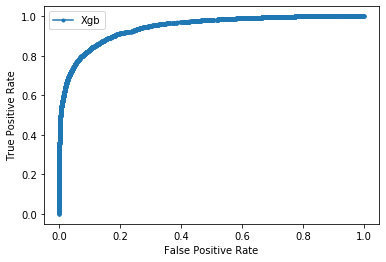

In [98]:
plot_roc_curve(y_train_balance, probs_train[:,1], model="Xgb")

[(0, 5000)]

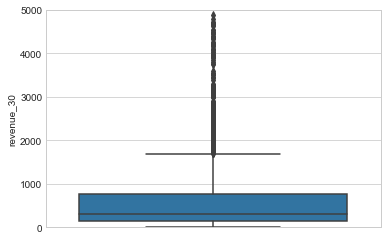

In [34]:
t = df_training[df_training['convert_30'] == 1]
ax = sns.boxplot(y = t['revenue_30'])
ax.set(ylim=(0, 5000))